In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


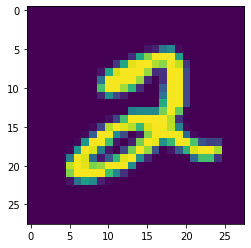

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(train_X[5])
plt.show()

In [6]:
# reshape datasets, create toy model for initial experimentation 
POC = train_X[0:599]
num,d1,d2 = POC.shape
POC = POC.reshape((num, d1 * d2))
POC_lbl = train_y[0:599]

POC_tst = train_X[400:599]
num,d1,d2 = POC_tst.shape
POC_tst = POC_tst.reshape((num, d1 * d2))
POC_lbl_tst = train_y[400:599]

num,d1,d2 = train_X.shape
train_X_transform = train_X.reshape((num, d1*d2))
num,d1,d2 = test_X.shape
test_X_transform = test_X.reshape((num, d1*d2))

In [18]:
from sklearn import svm

In [30]:
# use l1 regularization for linear SVC
svm_model = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.001, C=1)
svm_model.fit(train_X_transform,train_y)
score = svm_model.score(test_X_transform, test_y)
print('l1 regularization, squared hinge loss: ', score)

# use l2 regularization and squared hinge loss
svm_model = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.001, C=1)
svm_model.fit(train_X_transform,train_y)
score = svm_model.score(test_X_transform, test_y)
print('l2 regularization, squared hinge loss: ', score)

l1 regularization, squared hinge loss:  0.9165
l2 regularization, squared hinge loss:  0.9181


In [35]:
# Regularization Parameter Tests
CVals = [0.01, 0.1, 1, 10]
l1Scores = []

for i in range(len(CVals)):
    # use l1 regularization for linear SVC
    svm_model = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.001, C=CVals[i])
    svm_model.fit(train_X_transform[0:5000],train_y[0:5000])
    l1Scores.append(svm_model.score(test_X_transform[0:1000], test_y[0:1000]))
    print(l1Scores[i])

for i,e in enumerate(l1Scores):
    print('C = ', CVals[i], ', Accuracy = ', l1Scores[i])


/Users/nealdesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.844


/Users/nealdesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.814


/Users/nealdesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.825
0.826
C =  0.01 , Accuracy =  0.844
C =  0.1 , Accuracy =  0.814
C =  1 , Accuracy =  0.825
C =  10 , Accuracy =  0.826


/Users/nealdesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [36]:
l2Scores = []

for i in range(len(CVals)):
    # use l2 regularization for linear SVC
    svm_model = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.001, C=CVals[i])
    svm_model.fit(train_X_transform[0:5000],train_y[0:5000])
    l2Scores.append(svm_model.score(test_X_transform[0:1000], test_y[0:1000]))
    print(l2Scores[i])

for i,e in enumerate(l2Scores):
    print('C = ', CVals[i], ', Accuracy = ', l2Scores[i])

0.81
0.808
0.802
0.797
C =  0.01 , Accuracy =  0.81
C =  0.1 , Accuracy =  0.808
C =  1 , Accuracy =  0.802
C =  10 , Accuracy =  0.797


In [46]:
# use l1 regularization for linear SVC
svm_model = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.001, C=0.01)
svm_model.fit(train_X_transform,train_y)
score = svm_model.score(test_X_transform, test_y)
print('l1 regularization, squared hinge loss: ', score)

# use l2 regularization and squared hinge loss
svm_model = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.001, C=0.01)
svm_model.fit(train_X_transform,train_y)
score = svm_model.score(test_X_transform, test_y)
print('l2 regularization, squared hinge loss: ', score)

l1 regularization, squared hinge loss:  0.9179
l2 regularization, squared hinge loss:  0.9175


In [43]:
# Regularization Parameter Tests
CVals = [0.01, 0.1, 1, 10, 100]
rbfScores = []

for i in range(len(CVals)):
    # use l1 regularization for linear SVC
    svm_model = svm.SVC(C = CVals[i], kernel='rbf')
    svm_model.fit(train_X_transform[0:5000],train_y[0:5000])
    rbfScores.append(svm_model.score(test_X_transform[0:1000], test_y[0:1000]))
    print(rbfScores[i])

for i,e in enumerate(rbfScores):
    print('C = ', CVals[i], ', Accuracy = ', rbfScores[i])

0.545
0.89
0.936
0.945
0.945
C =  0.01 , Accuracy =  0.545
C =  0.1 , Accuracy =  0.89
C =  1 , Accuracy =  0.936
C =  10 , Accuracy =  0.945
C =  100 , Accuracy =  0.945


In [44]:
# Regularization Parameter Tests
CVals = [0.01, 0.1, 1, 10, 100]
polyScores = []

for i in range(len(CVals)):
    # use l1 regularization for linear SVC
    svm_model = svm.SVC(C = CVals[i], kernel='poly')
    svm_model.fit(train_X_transform[0:5000],train_y[0:5000])
    polyScores.append(svm_model.score(test_X_transform[0:1000], test_y[0:1000]))
    print(polyScores[i])

for i,e in enumerate(polyScores):
    print('C = ', CVals[i], ', Accuracy = ', polyScores[i])

0.48
0.83
0.919
0.926
0.928
C =  0.01 , Accuracy =  0.48
C =  0.1 , Accuracy =  0.83
C =  1 , Accuracy =  0.919
C =  10 , Accuracy =  0.926
C =  100 , Accuracy =  0.928


Based on n=5000 subset, our ideal hyperparameters are rbf kernel with a regularization constant C=10. Let's now try this on the entire 60,000 sample training set and validate on the full testing set. 

In [45]:
optimal_model = svm.SVC(C = 10, kernel='rbf')
optimal_model.fit(train_X_transform, train_y)
optimal_score = optimal_model.score(test_X_transform, test_y)
print(optimal_score)

0.9837
